In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# Loading training data
training = pd.read_csv("data/kaggle-house-prices/train.csv")
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
training.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,984,Unf,0,280,1264,GasA,Ex,Y,SBrkr,1282,1414,0,2696,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
1057,1058,60,RL,NaN,29959,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,6,1994,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,595,Unf,0,378,973,GasA,Ex,Y,SBrkr,979,871,0,1850,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,1994.0,Fin,2,467,TA,TA,Y,168,98,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,248000
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1234,1235,70,RH,55.0,8525,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,5,6,1911,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,Av,Unf,0,Unf,0,940,940,GasA,TA,N,FuseA,1024,940,0,1964,0,0,1,1,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,192,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Abnorml,130000
1037,1038,60,RL,NaN,9240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,396.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1055,1055,GasA,Ex,Y,SBrkr,1055,1208,0,2263,0,0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2001.0,Fin,2,905,TA,TA,Y,0,45,0,0,189,0,NaN,NaN,NaN,0,9,2008,WD,Normal,287000
1381,1382,20,RL,NaN,12925,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,865,Unf,0,340,1205,GasA,Ex,Y,SBrkr,2117,0,0,2117,0,0,2,1,4,1,TA,7,Typ,2,Gd,Attchd,1970.0,Fin,2,550,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,237500
628,629,60,RL,70.0,11606,Pave,NaN,IR1,HLS,AllPub,Inside,Sev,NAmes,Norm,Norm,1Fam,2Story,5,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,192.0,TA,TA,PConc,Gd,TA,Av,Rec,650,Unf,0,390,1040,GasA,TA,Y,SBrkr,1040,1040,0,2080,0,1,1,2,5,1,Fa,9,Typ,2,TA,Attchd,1969.0,Unf,2,504,TA,TA,Y,335,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Family,135000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
868,869,60,RL,NaN,14762,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Sl

In [4]:
SalesPrice = training.SalePrice

In [5]:
# Loading testing data
testing = pd.read_csv("data/kaggle-house-prices/test.csv")
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [6]:
training.shape, testing.shape

((1460, 81), (1459, 80))

In [7]:
# Combining training and testing data into a single dataframe
df = pd.concat([training.iloc[:, 0:80], testing], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [8]:
print("Training: ", training.shape)
print("Testing: ", testing.shape)
print("Combined: ", df.shape)

Training:  (1460, 81)
Testing:  (1459, 80)
Combined:  (2919, 80)


Loaded both datasets and combined them into a single dataset for data preprocessing. When we are ready for modeling prepearion, we will split them into 2 datasets.

Amount of NA values

In [9]:
df.isnull().sum().sum() / (df.shape[0] * df.shape[1])

0.0598021582733813

Close 6% of data points across entire dataset is NA. Find out which columns have null in them

In [10]:
def find_null_columns(): 
    null_columns = df.isnull().sum().sort_values(ascending = False)
    null_columns = null_columns[null_columns > 0]
    print("Total number of records: ", df.shape[0])
    print("No of columns with null values: ", len(null_columns))
    print("\nMissing values per column:")
    print(null_columns)
    
find_null_columns()

Total number of records:  2919
No of columns with null values:  34

Missing values per column:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64


There are 34 columns that contain null values. Let's analyze each of these columns one by one in the order of null occurrences.


### PoolQC

How many column names contain "pool" - likely that these are pool data related. 

In [11]:
def find_columns(df, search):
    matched = [c for c in df.columns if search.lower() in c.lower()]
    return matched

find_columns(df, "pool")

['PoolArea', 'PoolQC']

From the field types described above, we can see PoolArea is numeric and PoolQC is categorical. Find out where are any records where PoolArea is mentioned but PoolQC is null.

In [12]:
df.query("PoolArea >= 0 and PoolQC != PoolQC").shape

(2909, 80)

Out of these, how many have >0 PoolArea?

In [13]:
df.query("PoolArea > 0 and PoolQC != PoolQC")[['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
2420,368,NaN
2503,444,NaN
2599,561,NaN


We can impute the values of PoolQC, by looking at PoolArea value. Find out how many diff values are there for PoolQC and their freq and mean PoolArea

In [14]:
df.groupby("PoolQC").PoolArea.agg([np.mean, len])

,mean,len
PoolQC,,
Ex,359.75,4
Fa,583.50,2
Gd,648.50,4


So, we can input Ex, Ex, Fa respectively so that PoolArea values are closer the mean values for the respective PoolQC. Replace the rest of NA values under PoolQC with "None". 

In [15]:
df.loc[2420,'PoolQC'] = "Ex"
df.loc[2503,'PoolQC'] = "Ex"
df.loc[2599,'PoolQC'] = "Fa"
idx = df.query("PoolArea == 0 and PoolQC != PoolQC").index
df.loc[idx, 'PoolQC'] = "None"
df.query("PoolArea >= 0 and PoolQC != PoolQC").shape

(0, 80)

### Garage Fields

Find garage fields

In [16]:
garage_cols = find_columns(df, "garage")
df[garage_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 7 columns):
GarageType      2762 non-null object
GarageYrBlt     2760 non-null float64
GarageFinish    2760 non-null object
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
GarageQual      2760 non-null object
GarageCond      2760 non-null object
dtypes: float64(3), object(4)
memory usage: 159.7+ KB


Lets see what the deal is with GarageYrBlt. It seems reasonable that most houses would build a garage when the house itself was built. We can check this by seeing how many houses were built the same year their garage was built.

In [17]:
(df.GarageYrBlt == df.YearBuilt).value_counts()

True     2216
False     703
dtype: int64

2216 of the 2919 houses have same year for for GarageYrBlt and YearBuilt. Lets replace any of the NA’s for GarageYrBlt with the year from YearBuilt.

In [18]:
df.query("GarageYrBlt != GarageYrBlt").shape

(159, 80)

In [19]:
idx = df.query("GarageYrBlt != GarageYrBlt").index
df.loc[idx, "GarageYrBlt"] = df.loc[idx, "YearBuilt"]
(df.GarageYrBlt == df.YearBuilt).value_counts()

True     2375
False     544
dtype: int64

In [20]:
pd.isnull(df.GarageYrBlt).value_counts()

False    2919
Name: GarageYrBlt, dtype: int64

So, there is no more NA in the GarageYrBlt field.


Let's look at top 10 values of GarageYrBlt and top 10 YearBuilt values to to find any anamolies

In [21]:
print(df.GarageYrBlt.sort_values(ascending = False)[:10])
print(df.YearBuilt.sort_values(ascending = False)[:10])

2592    2207.0
378     2010.0
1502    2010.0
819     2010.0
1608    2010.0
987     2010.0
914     2009.0
572     2009.0
1661    2009.0
1711    2009.0
Name: GarageYrBlt, dtype: float64
378     2010
1576    2010
1502    2010
507     2009
898     2009
762     2009
87      2009
819     2009
103     2009
1608    2009
Name: YearBuilt, dtype: int64


In [22]:
df[df.GarageYrBlt == 2207][["GarageYrBlt", "YearBuilt"]]

,GarageYrBlt,YearBuilt
2592,2207.0,2006


Replace GarageYrBlt with YearBuild for record 2593

In [23]:
df.loc[2592, "GarageYrBlt"] = 2006

Plot histogram of GarageYrBlt

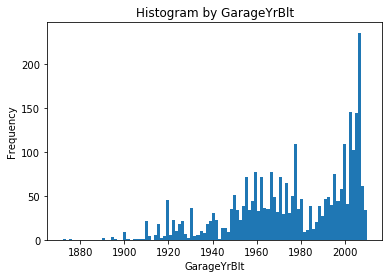

In [24]:
df.GarageYrBlt.plot.hist(bins = 100)
plt.title("Histogram by GarageYrBlt")
plt.xlabel("GarageYrBlt")

Plot histogram of YearBuilt

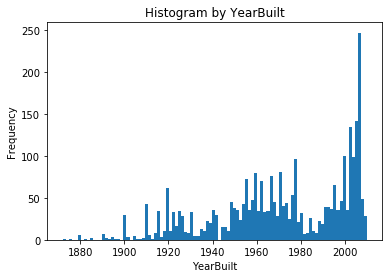

In [25]:
df.YearBuilt.plot.hist(bins = 100)
plt.title("Histogram by YearBuilt")
plt.xlabel("YearBuilt")

Let's see values at lower end to find any anamolies

In [26]:
print(df.GarageYrBlt.sort_values(ascending = True)[:10])
print(df.YearBuilt.sort_values(ascending = True)[:10])

1349    1872.0
1137    1875.0
2422    1890.0
2096    1890.0
2426    1895.0
2579    1895.0
2217    1895.0
1602    1896.0
1856    1900.0
1530    1900.0
Name: GarageYrBlt, dtype: float64
1349    1872
1137    1875
2451    1879
747     1880
1132    1880
1856    1880
630     1880
304     1880
991     1882
1416    1885
Name: YearBuilt, dtype: int64


At the lower values there is no obvious anamoly.



That leaves 6 garage features in our dataset and 4 of them have at least 157 missing values while GarageArea and GarageCars both only have 1, thus we can assume this particular house does not have a garage at all. For the rest of the houses we can check to see that if the NA’s recorded also have 0 GarageArea and 0 GarageCars. If they do we can fill in their missing values with ‘None’ since having 0 area and 0 cars in their garage will imply that they do not have any at all.


In [27]:
df[df.GarageCond.isnull()][garage_cols].query("GarageArea > 0")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN


Only one house who had NA’s in their garage columns had an area graeteer than 0. We can fill this house in manually and set the rest of the houses NA’s to 0.

For the house with GarageArea = 360 and GarageCars = 1, but NA’s in the other columns, we can use the most frequent values for each columns from houses with a similar area and car count.

In [28]:
idx = df.query("GarageArea >= 350 and GarageArea <= 370").index
df2 = df.loc[idx, garage_cols]
df2

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
12,Detchd,1962.0,Unf,1.0,352.0,TA,TA
14,Attchd,1960.0,RFn,1.0,352.0,TA,TA
59,Detchd,1973.0,Unf,1.0,352.0,TA,TA
71,Detchd,1987.0,Unf,2.0,360.0,TA,TA
98,Basment,1920.0,Unf,1.0,366.0,Fa,TA
194,Detchd,1989.0,Unf,1.0,352.0,TA,TA
242,Attchd,1940.0,Unf,1.0,352.0,Fa,TA
325,Detchd,1941.0,Unf,2.0,360.0,TA,TA
330,Detchd,2002.0,Unf,1.0,352.0,TA,TA
383,Detchd,1950.0,Unf,2.0,360.0,Fa,Fa


Find most common values for each column

In [29]:
def mostFrequent(col):
    counts = col.value_counts()
    counts = counts.sort_values(ascending = False)
    return  counts.index[0]

df2.apply(mostFrequent, axis = 0)

GarageType      Detchd
GarageYrBlt       1950
GarageFinish       Unf
GarageCars           1
GarageArea         352
GarageQual          TA
GarageCond          TA
dtype: object

In [30]:
df.loc[2126, "GarageQual"] = "TA"
df.loc[2126, "GarageFinish"] = "Unf"
df.loc[2126, "GarageCond"] = "TA"

Now we can fill in any missing numeric values with 0 and categoric with ‘None’ since these houses recorded having 0 area and 0 cars in their garage.

In [31]:
pd.isnull(df[garage_cols]).sum()

GarageType      157
GarageYrBlt       0
GarageFinish    158
GarageCars        1
GarageArea        1
GarageQual      158
GarageCond      158
dtype: int64

In [32]:
garage_cols

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [33]:
def replace_with(df, col, fill_with):
    idx = df[df[col].isnull()].index
    df.loc[idx, col] = fill_with
    
for c in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    replace_with(df, c, "None")

for c in ["GarageCars", "GarageArea"]:
    replace_with(df, c, 0.0)

pd.isnull(df[garage_cols]).sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

### KitchenQual and Electrical

With only 1 missing value for KitchenQual and Electrical each we can fill in the missing value with the most frequent value from each column.

In [34]:
df[find_columns(df, "kitchen")].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 2 columns):
KitchenAbvGr    2919 non-null int64
KitchenQual     2918 non-null object
dtypes: int64(1), object(1)
memory usage: 45.7+ KB


In [35]:
df.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [36]:
replace_with(df, "KitchenQual", "TA")

In [37]:
df[find_columns(df, "electrical")].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 1 columns):
Electrical    2918 non-null object
dtypes: object(1)
memory usage: 22.9+ KB


In [38]:
df.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [39]:
replace_with(df, "Electrical", "SBrkr")
df[find_columns(df, "electrical")].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 1 columns):
Electrical    2919 non-null object
dtypes: object(1)
memory usage: 22.9+ KB


### Basement

In [40]:
basement_columns = find_columns(df, "bsmt")
df[basement_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
BsmtQual        2838 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
dtypes: float64(6), object(5)
memory usage: 250.9+ KB


From the documetation below are the description of these fields.
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms

There are 11 basement features each with at least 1 missing value. We can take a look at the subset of just these columns from our data.

In [41]:
df[df.BsmtExposure.isnull()][basement_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
342,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [42]:
df.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

Almost all of the missing values for each categoric basement feature comes from houses with 0 on each features corresponding to area. We can fill in these values with ‘None’ since these houses certainly don’t have basements. Rows 949, 1488 and 2349 are the only missing values from BsmtExposure, we can fill this with No as that is the most frequent value and these houses most likely don’t have any exposure for their basements. The rest of the basement columns corresponding to area will be filled with 0 since they likely don’t have a basement and the categoric missing values will be filled with NoBsmt.

In [43]:
df.loc[[949, 1488, 2349], 'BsmtExposure'] = 'No'

In [44]:
df[basement_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
BsmtQual        2838 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
dtypes: float64(6), object(5)
memory usage: 250.9+ KB


In [45]:
for c in ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]:
    replace_with(df, c, "None")

for c in ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
          "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]:
    replace_with(df, c, 0.0)
    
df[basement_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
BsmtQual        2919 non-null object
BsmtCond        2919 non-null object
BsmtExposure    2919 non-null object
BsmtFinType1    2919 non-null object
BsmtFinSF1      2919 non-null float64
BsmtFinType2    2919 non-null object
BsmtFinSF2      2919 non-null float64
BsmtUnfSF       2919 non-null float64
TotalBsmtSF     2919 non-null float64
BsmtFullBath    2919 non-null float64
BsmtHalfBath    2919 non-null float64
dtypes: float64(6), object(5)
memory usage: 250.9+ KB


In [46]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  13

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64


### Exterior

In [47]:
exterior_columns = find_columns(df, "exterior")
exterior_columns

['Exterior1st', 'Exterior2nd']

In [48]:
df.query("Exterior1st != Exterior1st or Exterior2nd != Exterior2nd")[exterior_columns]

,Exterior1st,Exterior2nd
2151,NaN,NaN


In [49]:
df.loc[2151, "Exterior1st"] = "Other"
df.loc[2151, "Exterior2nd"] = "Other"

In [50]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  11

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
SaleType          1
dtype: int64


### Sale Type

SaleType, Functional and Utilities have less than 3 missing values. For SaleType we can see what the SaleCondition of the house was and use a contingency table to see which SaleType and SaleCondition overlap together the most.

In [51]:
sale_columns = find_columns(df, "sale")
sale_columns

['SaleType', 'SaleCondition']

In [52]:
df[df.SaleType.isnull()][sale_columns]

,SaleType,SaleCondition
2489,NaN,Normal


In [53]:
df.groupby(["SaleType", "SaleCondition"]).Id.count().unstack()

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
SaleType,,,,,,
COD,46.0,NaN,NaN,2.0,39.0,NaN
CWD,1.0,NaN,NaN,1.0,10.0,NaN
Con,NaN,NaN,NaN,NaN,4.0,1.0
ConLD,3.0,NaN,NaN,1.0,21.0,1.0
ConLI,2.0,NaN,NaN,2.0,5.0,NaN
ConLw,NaN,NaN,NaN,1.0,7.0,NaN
New,NaN,NaN,NaN,NaN,NaN,239.0
Oth,5.0,NaN,NaN,1.0,1.0,NaN
WD,133.0,12.0,24.0,38.0,2314.0,4.0


In [54]:
df.loc[2489, "SaleType"] = "WD"
find_null_columns()

Total number of records:  2919
No of columns with null values:  10

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
dtype: int64


### Functional

There is no field that could help us replace the NA value for Functional. So let replace NA with most freq value.


In [55]:
functional_columns = find_columns(df, "func")
functional_columns

['Functional']

In [56]:
df.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [57]:
replace_with(df, "Functional", "Typ")

In [58]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  9

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
dtype: int64


### Utilities
Utilities only has 1 value for NoSeWa and the rest AllPub. We can drop this feature from our dataset as the house with ‘NoSeWa’ is from our training set and will have won’t help with any predictive modelling

In [59]:
df.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [60]:
del df["Utilities"]
find_null_columns()

Total number of records:  2919
No of columns with null values:  8

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
MasVnrType       24
MasVnrArea       23
MSZoning          4
dtype: int64


### MSZoning

MSZoning: The general zoning classification
MSSubClass: The building class

There are only 4 missing values for MSZoning. We can see what the subclass is for the houses with missing values for Zoning.

In [61]:
zoning_columns = ["MSZoning", "MSSubClass"]
df[df.MSZoning.isnull()][zoning_columns]

,MSZoning,MSSubClass
1915,NaN,30
2216,NaN,20
2250,NaN,70
2904,NaN,20


Find the most frequent corresponding subclass

In [62]:
df.groupby(["MSSubClass", "MSZoning"]).Id.count().unstack()

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,3.0,34.0,4.0,1016.0,20.0
30,8.0,NaN,2.0,61.0,67.0
40,NaN,NaN,NaN,4.0,2.0
45,NaN,NaN,1.0,6.0,11.0
50,7.0,NaN,2.0,159.0,119.0
60,NaN,43.0,NaN,529.0,3.0
70,4.0,NaN,3.0,57.0,63.0
75,NaN,NaN,NaN,9.0,14.0
80,NaN,NaN,NaN,115.0,3.0


In [63]:
df.loc[1915, "MSZoning"] = "RM"
df.loc[2216, "MSZoning"] = "RL"
df.loc[2250, "MSZoning"] = "RM"
df.loc[2904, "MSZoning"] = "RL"

In [64]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  7

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
MasVnrType       24
MasVnrArea       23
dtype: int64


### Masonry

MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet

There are 23 missing values for MasVnrArea and 24 for MasVnrType. We can see if both missing values come from the same houses

In [65]:
masonary_columns = find_columns(df, "mas")
masonary_columns

['MasVnrType', 'MasVnrArea']

In [66]:
df[df.MasVnrType.isnull() | df.MasVnrArea.isnull()][masonary_columns]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


All but one house has missing values for both columns. For houses with NA’s on both columns we can fill 0 for the area and None for the type since they likely do not have a masonry veneer. For the house with a MasVnrArea of 198 but NA for MasVnrType we can record the median areas for each type and see which type is closest to 198.

In [67]:
df.groupby("MasVnrType").MasVnrArea.agg([len, np.median])

,len,median
MasVnrType,,
BrkCmn,25.0,161.0
BrkFace,879.0,203.0
None,1742.0,0.0
Stone,249.0,200.0


In [68]:
df.loc[2610, "MasVnrType"] = "Stone"
replace_with(df, "MasVnrType", "None")
replace_with(df, "MasVnrArea", 0)

find_null_columns()

Total number of records:  2919
No of columns with null values:  5

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
LotFrontage     486
dtype: int64


### LotFrontage: Linear feet of street connected to property
There are 486 missing values for LotFrontage, which is quite a lot of values to fill and we can’t just replace these with 0. We’re given that “LotFrontage: Linear feet of street connected to property.” The area of each street connected to the house property is most likely going to have a similar area to other houses in its neighborhood. We can group by each neighborhood and take the median of each LotFrontage and fill the missing values of each LotFrontage based on what neighborhood the house comes from.



In [69]:
lot_columns = find_columns(df, "lot")
lot_columns.append("Neighborhood")
lot_columns

['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood']

In [70]:
neighborhood = df.groupby("Neighborhood").LotFrontage.agg([len, np.median])
neighborhood

,len,median
Neighborhood,,
Blmngtn,28.0,43.0
Blueste,10.0,24.0
BrDale,30.0,21.0
BrkSide,108.0,51.0
ClearCr,44.0,80.5
CollgCr,267.0,70.0
Crawfor,103.0,70.0
Edwards,194.0,65.0
Gilbert,165.0,64.0


In [71]:
df2 = df[lot_columns].merge(neighborhood, 
                      left_on="Neighborhood", right_index=True)
df2

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,len,median
0,65.0,8450,Reg,Inside,CollgCr,267.0,70.0
2,68.0,11250,IR1,Inside,CollgCr,267.0,70.0
13,91.0,10652,IR1,Inside,CollgCr,267.0,70.0
22,75.0,9742,Reg,Inside,CollgCr,267.0,70.0
32,85.0,11049,Reg,Corner,CollgCr,267.0,70.0
36,112.0,10859,Reg,Corner,CollgCr,267.0,70.0
43,NaN,9200,IR1,CulDSac,CollgCr,267.0,70.0
57,89.0,11645,IR1,Corner,CollgCr,267.0,70.0
59,60.0,7200,Reg,Inside,CollgCr,267.0,70.0
64,NaN,9375,Reg,Inside,CollgCr,267.0,70.0


In [72]:
idx = df[df.LotFrontage.isnull()].index
df.loc[idx, "LotFrontage"] = df2.loc[idx, "median"]
df[lot_columns].merge(neighborhood, 
                      left_on="Neighborhood", right_index=True)

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,len,median
0,65.0,8450,Reg,Inside,CollgCr,267.0,70.0
2,68.0,11250,IR1,Inside,CollgCr,267.0,70.0
13,91.0,10652,IR1,Inside,CollgCr,267.0,70.0
22,75.0,9742,Reg,Inside,CollgCr,267.0,70.0
32,85.0,11049,Reg,Corner,CollgCr,267.0,70.0
36,112.0,10859,Reg,Corner,CollgCr,267.0,70.0
43,70.0,9200,IR1,CulDSac,CollgCr,267.0,70.0
57,89.0,11645,IR1,Corner,CollgCr,267.0,70.0
59,60.0,7200,Reg,Inside,CollgCr,267.0,70.0
64,70.0,9375,Reg,Inside,CollgCr,267.0,70.0


In [73]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  4

Missing values per column:
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
dtype: int64


### Fence: Fence quality
We can replace any missing vlues for Fence and MiscFeature with ‘None’ as they probably don’t have this feature with their property.

In [74]:
df.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [75]:
replace_with(df, "Fence", "None")

In [76]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  3

Missing values per column:
MiscFeature    2814
Alley          2721
FireplaceQu    1420
dtype: int64


### MiscFeature

In [77]:
replace_with(df, "MiscFeature", "None")
find_null_columns()

Total number of records:  2919
No of columns with null values:  2

Missing values per column:
Alley          2721
FireplaceQu    1420
dtype: int64


### Fireplace

- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality. FireplaceQu denotes the fireplace quality.

We can check to see if any of the missing values for FireplaceQu come from houses that recorded having at least 1 fireplace.

In [78]:
fire_columns = find_columns(df, "fire")
fire_columns

['Fireplaces', 'FireplaceQu']

In [79]:
df.groupby(["FireplaceQu", "Fireplaces"]).Id.count().unstack()

Fireplaces,1,2,3,4
FireplaceQu,,,,
Ex,37.0,5.0,1.0,NaN
Fa,63.0,10.0,1.0,NaN
Gd,627.0,112.0,5.0,NaN
Po,46.0,NaN,NaN,NaN
TA,495.0,92.0,4.0,1.0


In [80]:
df[df.FireplaceQu.isnull()][fire_columns]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


All the houses that have missing values did not record having any fireplaces. We can replace the NA’s with ‘None’ since these houses don’t have any fireplaces at all.

In [81]:
replace_with(df, "FireplaceQu", "None")

In [82]:
find_null_columns()

Total number of records:  2919
No of columns with null values:  1

Missing values per column:
Alley    2721
dtype: int64


### Alley: Type of alley access

There are 2721 missing values for Alley and only 2 potential options - Grvl and Pave. We can fill ‘None’ for any of the houses with NA’s as these houses must not have any type of alley access.


In [83]:
replace_with(df, "Alley", "None")
find_null_columns()

Total number of records:  2919
No of columns with null values:  0

Missing values per column:
Series([], dtype: int64)


# Congratulations! There is no more missing values

Let's add back the SalePrice column to the dataset. Note for the testing data, there is not SalePrice. So for those, the field will be null.


In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [85]:
df["SalesPrice"] = np.nan
df.loc[0:training.shape[0], "SalesPrice"] = SalesPrice
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [86]:
df.to_csv("data/kaggle-house-prices/data_combined_cleaned.csv", index = False)

# Visualization

Plot the following for train.csv
- Saleprice  - histogram or boxplot
- YearBuilt - histogram (better) or frequency plot 
- Saleprice vs YearBuilt - horizontal bar chart 
- Saleprice  vs GarageArea  - scatter chart
- Median Saleprice by SaleCondition and BldgType - heatmap


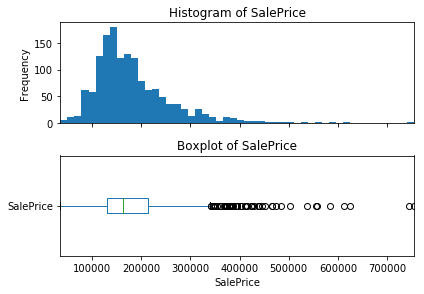

In [87]:
xlims = training.SalePrice.min(), training.SalePrice.max()

plt.subplot(2, 1, 1)
training.SalePrice.plot.hist(bins = 50, xlim = xlims, sharex = True, title = "Histogram of SalePrice")
plt.subplot(2, 1, 2)
training.SalePrice.plot.box(vert = False, xlim = xlims, sharex = True, title = "Boxplot of SalePrice")
plt.tight_layout()
plt.xlabel("SalePrice")

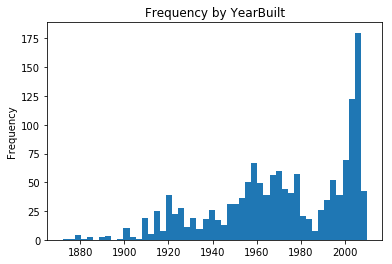

In [88]:
training.YearBuilt.plot.hist(bins = 50, title = "Frequency by YearBuilt")

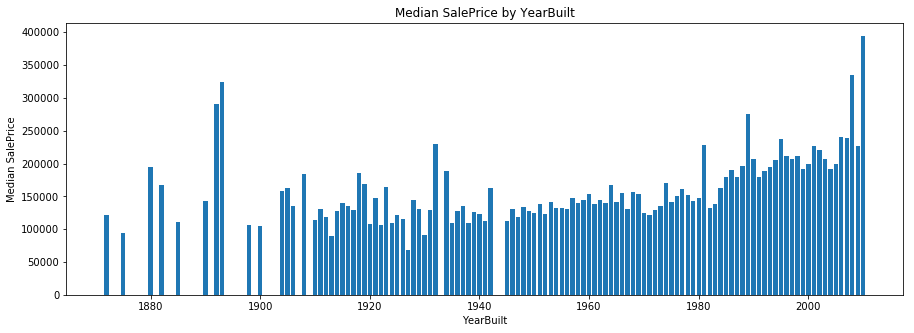

In [89]:
grouped = training.groupby("YearBuilt").SalePrice.median().sort_index()
plt.figure(figsize=(15, 5))
plt.bar(grouped.index, grouped)
plt.xlabel("YearBuilt")
plt.ylabel("Median SalePrice")
plt.title("Median SalePrice by YearBuilt")

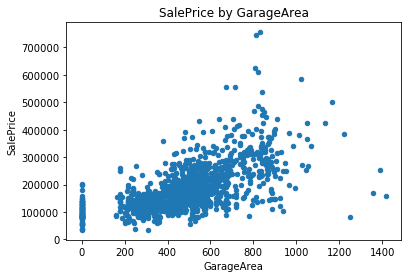

In [90]:
training.plot.scatter("GarageArea", "SalePrice")
plt.title("SalePrice by GarageArea")

In [91]:
import seaborn as sns

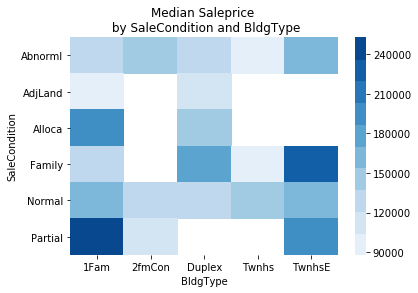

In [92]:
grouped = training.groupby(["SaleCondition","BldgType"]).SalePrice.median().unstack()
blues = sns.color_palette("Blues", n_colors=10)
sns.heatmap(grouped, cmap = blues)
plt.title("Median Saleprice \n by SaleCondition and BldgType")